In [2]:
#Importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [3]:
#creating a Dataframe
df=pd.read_csv(r"C:\Users\sagar\Downloads\tamo2.csv",index_col="Date",parse_dates=["Date"])

In [4]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-06-01,TATAMOTORS,EQ,476.15,476.95,479.70,473.55,477.00,476.65,476.60,3001232,1.430387e+09,40932,1269506,42.30
2017-06-02,TATAMOTORS,EQ,476.65,480.00,485.95,477.70,477.95,478.75,481.96,4319080,2.081632e+09,54392,1418366,32.84
2017-06-05,TATAMOTORS,EQ,478.75,478.30,481.90,475.20,478.60,478.15,478.48,2464819,1.179365e+09,37117,1054430,42.78
2017-06-06,TATAMOTORS,EQ,478.15,482.90,484.35,457.60,461.70,461.00,467.17,8016939,3.745259e+09,134732,3213087,40.08
2017-06-07,TATAMOTORS,EQ,461.00,462.55,463.65,453.50,458.60,458.00,457.44,5250544,2.401834e+09,83797,2326345,44.31


In [5]:
#this a Sub Dataframe of Dataframe df
subdf=df[["Close Price"]]

In [6]:
subdf.head()

,Close Price
Date,
2017-06-01,476.65
2017-06-02,478.75
2017-06-05,478.15
2017-06-06,461.00
2017-06-07,458.00


In [8]:
#22 Moving Average(MA) Considered
subdf["MA22"]=subdf["Close Price"].rolling(22).mean()

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
subdf.tail()

,Close Price,MA22
Date,,
2019-05-27,181.35,191.454545
2019-05-28,180.25,189.484091
2019-05-29,176.35,187.415909
2019-05-30,175.15,185.577273
2019-05-31,172.60,183.681818


In [23]:
#To smooth out the 22MA, We created 22 Centered Moving Average(CMA)
subdf["CMA22"]=subdf["MA22"].rolling(2).mean()
#Shifting one position up for centering
subdf["CMA22"]=subdf["CMA22"].shift(-1)

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
subdf.tail()

,Close Price,MA22,CMA22
Date,,,
2019-05-27,181.35,191.454545,190.469318
2019-05-28,180.25,189.484091,188.450000
2019-05-29,176.35,187.415909,186.496591
2019-05-30,175.15,185.577273,184.629545
2019-05-31,172.60,183.681818,NaN


In [26]:
#We need to get the data of Sesonality and irregularity
subdf["SeaIrr"]=subdf["Close Price"]/subdf["CMA22"]

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
#Extracting Seasonal data
z=[]
k=[]
for i in range(0,12):
    z=subdf["SeaIrr"][i+12:495:12]
    k.append(z.mean())

m=[]
while len(m)<496:
    for i in k:
        m.append(i)
x=m[0:495]

subdf["Season"]=x

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
subdf.tail()

,Close Price,MA22,CMA22,SeaIrr,Season
Date,,,,,
2019-05-27,181.35,191.454545,190.469318,0.952122,0.986161
2019-05-28,180.25,189.484091,188.450000,0.956487,0.987229
2019-05-29,176.35,187.415909,186.496591,0.945594,0.980252
2019-05-30,175.15,185.577273,184.629545,0.948656,0.980344
2019-05-31,172.60,183.681818,NaN,NaN,0.977820


In [32]:
#Deseasoning the data
subdf["Deseason"]=subdf["Close Price"]/subdf["Season"]

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
#Days in x-axis to forecast data, so adding days column
subdf["days"]=range(1,496)

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
subdf.tail()

,Close Price,MA22,CMA22,SeaIrr,Season,Deseason,days
Date,,,,,,,
2019-05-27,181.35,191.454545,190.469318,0.952122,0.986161,183.895009,491
2019-05-28,180.25,189.484091,188.450000,0.956487,0.987229,182.581752,492
2019-05-29,176.35,187.415909,186.496591,0.945594,0.980252,179.902721,493
2019-05-30,175.15,185.577273,184.629545,0.948656,0.980344,178.661811,494
2019-05-31,172.60,183.681818,NaN,NaN,0.977820,176.515081,495


In [37]:
#Regression is used to predict price
reg=linear_model.LinearRegression()
reg.fit(subdf[["days"]],subdf[["Deseason"]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
p=[]
for i in range(1,496):
    p.append(float(reg.predict(i)))

subdf["trend"]=p

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [39]:
#We show the forecasted data of the following Analysis
subdf["Forecast"]=subdf["Season"]*subdf["trend"]

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


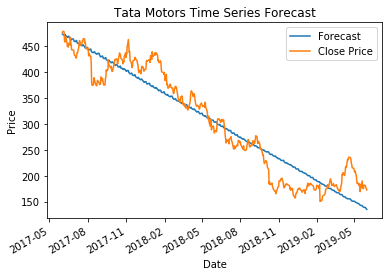

In [43]:
plt.ylabel("Price")
plt.title("Tata Motors Time Series Forecast")
subdf["Forecast"].plot()
subdf["Close Price"].plot()
plt.legend()

In [42]:
#Writing the data to csv
subdf.to_csv(r"C:\Users\sagar\Desktop\TimeSeriesFore1.csv")